1. If you want to predict future data based on historical data
2. If you want to see which combinations of the given data are related to each other

Linear regression analysis is mainly used in these two cases.

   'If the cumulative number of visitors by Thursday is [X], what is the cumulative number of visitors by that Sunday?' For this project, linear regression analysis was used with an emphasis on function 1 above.
   
   So I called the visitor data of the CSV file by date as an available object. I was able to easily import data into a DataFrame object using Pandas.

In [3]:
import time
import math
import csv
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv('Desktop/df.csv')
df=df.sort_index()
df.columns=['Date','Number']
print(df.shape)
df[:3]

(567, 2)


,Date,Number
0,2016-09-05,18304
1,2016-09-06,24320
2,2016-09-07,23888


   It can be seen that there are 567 pieces of data, that is, 567/7 = 81 weeks.
   Let's visualize the number of visitors by date.
It ranges from 10,000 to about 40,000, and is concentrated mainly in between 20,000 to 25,000.


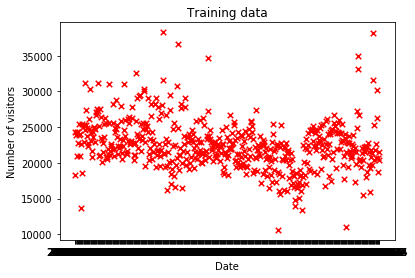

In [5]:
arr=np.array(df)
x_train = arr[:,0] #date
y_train = arr[:,1] #number

plt.figure(1)#
plt.scatter(x_train, y_train, s=30, c='r', marker='x', linewidths=1) 
plt.title('Training data')
plt.xlabel('Date')
plt.ylabel('Number of visitors')
plt.show()

   Now that I have the data, let's do it by machining it according to the model. The regression model, which I have learned, is one of the supervised learning methods. Supervised learning is a method of learning a model by including desired results in learning data. If the result of the inferred function is continuous, it is called regression. If it is discrete, it is called classification.

   The goal is to predict the total number of visitors per week when you enter the number of cumulative visitors by a specific day. For this purpose, the number of cumulative visitors per day should be obtained and transmitted as learning data. Also, due to the nature of instructional learning, the 'total number of visitors in the state', which is the desired result, should be provided along with the learning data.

   I have calculated the integer index of my current data by changing it to timestamp.
   TimeStamp is the time corresponding to the visitor data by date from September 5, 2016 to March 25, 2018, and each week is again seven days from Monday to Sunday. Therefore, the information on the number of accumulated visitors per day for each week should be processed as learning data.

In [6]:
def date_to_ts(dt):
    return int(time.mktime(datetime.strptime(dt,"%Y-%m-%d").timetuple()))


df['timestamps'] = df['Date'].apply(lambda x: date_to_ts(x))
df.set_index(df['timestamps'],inplace=True)
df=df.drop('timestamps',1)
df[:3]

,Date,Number
timestamps,,
1473004800,2016-09-05,18304
1473091200,2016-09-06,24320
1473177600,2016-09-07,23888


1. Declare the convert_to_index function, which allows you to change the datetime date to a timestamp format to filter the index.
2. Filter the index by date.
3. Use the cumsum command of pandas.DataFrame to create a list of the number of cumulative visitors per day in the 'Number' field.
4. Store the cumulative data for Sunday as the total number of visitors per week, which is the data I want.

Because this model is a linear regression with one parameter, two-thirds of the total data is used as a train set and the rest as a test set.

In [7]:
def convert_to_index(dt):
    return time.mktime(dt.timetuple())

In [33]:
base_date=datetime(2016,9,5,0,0)

L=[]
for loop in range(61):
    from_index=convert_to_index(base_date)
    to_index=convert_to_index(base_date + timedelta(days=7))
    data=df[(from_index<=df.index) & (df.index<to_index)]
    L.append(data.Number.cumsum().tolist())
    
    base_date=base_date + timedelta(days=7)
    
Y=[y[-1] for y in L]

print(L[0]) #accumulation value of first week
#print(L[0][0])
print(L[1]) #accumulation value of second week
#print(L)
print (Y) #sum for a week
len(Y) #61 weeks

[18304, 42624, 66512, 87464, 111780, 134556, 158829]
[25515, 49464, 70461, 94487, 117068, 130703, 149338]
[158829, 149338, 179848, 172181, 167982, 178999, 179754, 160117, 157346, 166460, 170985, 166618, 163759, 169782, 169806, 162297, 180269, 176232, 177876, 169167, 166525, 170608, 160731, 190272, 149800, 152048, 149753, 175244, 157949, 165876, 153667, 157794, 157153, 153400, 157794, 178426, 155895, 151910, 154245, 147807, 152291, 162656, 157351, 149493, 151978, 146436, 166798, 153487, 154129, 152590, 146989, 138480, 150012, 142552, 131223, 140441, 143611, 134098, 116058, 120201, 125482]


61

Obtain the average cumulative number of visitors per day of the week.

Average number of cumulative visitors until Wednesday = 
(Cumulative number of visitors on Wednesday in the 1st week + Cumulative number of visitors on Wednesday in the 2nd week + Cumulative number of visitors on Wednesday in the 3rd week ... + Cumulative number of visitors on Wednesday in 61st week) / 61

Perform the above process from Monday to Sunday.

In [9]:
b=[]
def acc_rate(L):
    for j in range(7):
        a=[]
        for i in range(21):
            a.append(L[i][j])
        b.append(a)   
        
acc_rate(L)

print(b[0])#accumulation rate until monday
print(b[1])#accumulation rate until tuesday
print(len(b[0]))

acc=[]
for j in range(7):
    acc.append(np.mean(b[j]))
    acc[j]=math.trunc(acc[j])# round off to the nearest one
print(acc)

[18304, 25515, 25398, 27342, 30290, 24930, 31244, 23435, 26230, 30993, 28259, 28743, 22435, 24591, 23084, 22825, 22771, 23382, 25608, 25559, 22104]
[42624, 49464, 50391, 52214, 54428, 50013, 58468, 46630, 51844, 56640, 53911, 52332, 50425, 55661, 49172, 49128, 48685, 52698, 50332, 50682, 50392]
21
[25382, 51244, 76362, 99838, 122675, 145142, 168770]


In [34]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    ax = plt.subplot()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw=2, color = '#539caf')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

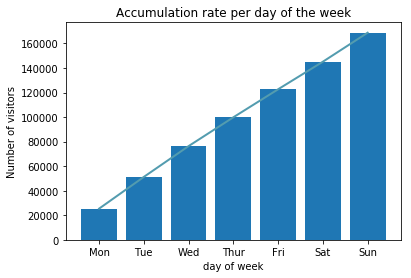

In [35]:
y_data=acc
x_data=np.arange(len(y_data))
LABELS = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

lineplot(x_data,y_data,"day of week","Number of visitors","Accumulation rate per day of the week")

plt.bar(x_data, y_data, align='center')
plt.xticks(x_data, LABELS)
plt.show()

As a matter of fact, sklearn's models often require vector-type data as input. The same is true for the LinearRegression model. Therefore, it is necessary to change the learning data of the time base from the basic type Integer type to List type. I did this in the block below.

In [12]:
X={}
for i, day in zip(range(7),range(7)):
    data=list(map(lambda el: el[i], L))
    X[day]=list(map(lambda el: [el], data))
print(list(X[0]))    
#X[0]: value of Mondays
#X[1]: value of Tuesdays ...X[6]: value of Sundays
print(len(X),len(X[0]))

[[18304], [25515], [25398], [27342], [30290], [24930], [31244], [23435], [26230], [30993], [28259], [28743], [22435], [24591], [23084], [22825], [22771], [23382], [25608], [25559], [22104], [22650], [21744], [26943], [19422], [20139], [22302], [20675], [21168], [23720], [22869], [23328], [20750], [21344], [21479], [23340], [23405], [22650], [21846], [22644], [21502], [23136], [22822], [21210], [20800], [23071], [23914], [25222], [20640], [22308], [18447], [18189], [18249], [18993], [10617], [18133], [20447], [17836], [17183], [16516], [16086]]
7 61


Learning is really easy once the data is ready. When I enter the learning data into the LinearRegression.fit () function, all learning begins. In the case of this project, it is almost complete because there are hundreds of learning data.

In [24]:
models={}
for day in range(7):
    model=LinearRegression(normalize=True)
    model.fit(X[day],Y)
    models[day]=model

I got a well-learned model for each hour of the day. But how do you know if each model is well learned? There is a Coefficient of Determination as a general method for determining whether a linear model is suitable for a given data.

In the case of the LinearRegression model, the decision coefficient can be obtained through a function called score. In other words, the lower the score, the less effective it is.

Because this model is a linear regression with one parameter, two-thirds of the total data is used as a train set and the rest as a test set.

In [29]:
#test
base_date=datetime(2017,11,6,0,0)

L=[]
for idx in range(20):
    from_index=convert_to_index(base_date)
    to_index=convert_to_index(base_date + timedelta(days=7))
    x=df[(from_index<=df.index) & (df.index<to_index)]
    L.append(x.Number.cumsum().tolist())
    
    base_date=base_date + timedelta(days=7)
    
Y_test=[y[-1] for y in L]

print(L[0]) #first week
print (Y_test) #sum for a week


X_test={}
for i in range(7):
    X_test[i]=np.array(list(map(lambda el:el[i],L)))[:,None]
    
#print(X_test)

[18318, 40432, 63787, 80853, 100803, 122783, 147040]
[147040, 155870, 162785, 156976, 162082, 156442, 156300, 161162, 165909, 169001, 152215, 144228, 152278, 149505, 183339, 142974, 147788, 140360, 179791, 158563]


In [37]:
def score(day,models):
    if day==0:
        print ('Model  Monday')
    elif day==1:
        print ('Model  Tuesday')
    elif day==2:
        print ('Model  Wednesday')
    elif day==3:
        print ('Model  Thursday')
    elif day==4:
        print ('Model  Friday')
    elif day==5:
        print ('Model  Saturday') 
    else:
        print('Model  Sunday')
    print ('Score: %.2f' % models[day].score(X_test[day],Y_test))    
        
score(4,models)


Model  Friday
Score: 0.82


Now that the learning is over, I predicted the expected number of visitors per week with the model and test data. If there were 100,803 cumulative visitors this Friday, what would be the cumulative value by Sunday?

Once the model is learned, the predicted results are confirmed through the predict command as shown below. Entering '100,803', which is the cumulative number of visitors until Friday, predicts the cumulative value of the week. The total cumulative value predicted by the model is 143,401, and the actual cumulative value of the corresponding week is 147,040. It can be seen that the result predicted through the cumulative number of visitors per day almost coincides with the actual weekly coincident cumulative value.

In [ ]:
print(int(models[4].predict(100803)[0]),Y_test[0])

#Input the accumulation rate until Friday(100803)
#-> machine predicts the weekly accumulative value as 143401
#-> the actual value is 147040